In [20]:
#import libraries

import warnings; warnings.simplefilter('ignore')

import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from time import time

import sklearn

# Regression /Classification
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Building everything
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# This allows to apply plots in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
#plt.rcParams['font.size'] = 10
#plt.style.use("fivethirtyeight")



In [21]:
# Read the data file  and load into dataframe.
data = pd.read_csv(r'C:\Users\meghs\Downloads\Admission_Predict_Ver1.1.csv')
# print the first 5 rows of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
#remove serial no.
data.drop(columns = 'Serial No.', inplace = True)
# print the first 5 rows of the data
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
# Check the null values - We can see that there are no missing values in the data set
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


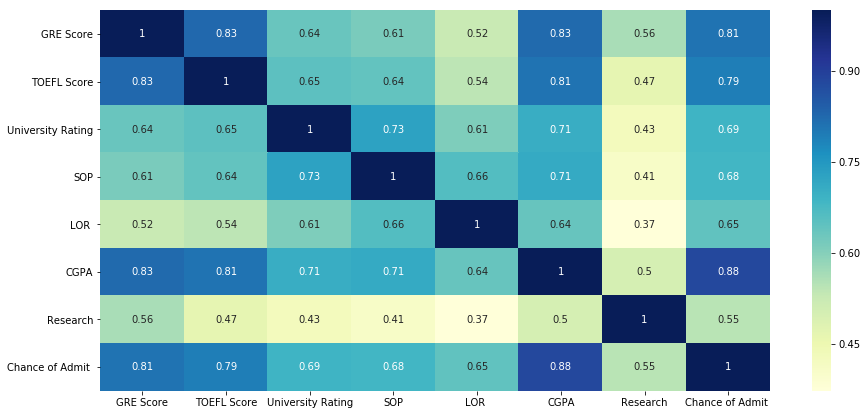

In [25]:
# Find correlation between different features
#Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.
plt.figure(figsize=(15,7));
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu");

In [30]:
#lets pick  GRE,TOEFL and CGPA as 3 factors maily affecting Chances of admit
#X=data[['GRE Score','TOEFL Score','CGPA']]

#When dataset is small, it is better to use all given features for better prediction
X=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
#chance of admit is given as percentage/100, values are continuous 
#Linear regression is the best option,still lets check for all available regressors
#Solving it as a regression problem
#Check at once for all available regressors

heldout = [0.90, 0.80, 0.70, 0.60]
time_arr=[]
accuracy_arr=[]
rounds = 50
# ("SGD", SGDClassifier(), "aqua"),
print("Regressor Techniques")
classifiers = [
           ("Linear Regression", LinearRegression(),"red"),
           ("Random Forest Regression", RandomForestRegressor(),"blue"),
           ("Decision Tree Regression", DecisionTreeRegressor(),"green"),
           ("KNN Regression", KNeighborsRegressor(),"yellow" )]

xx = 1. - np.array(heldout)

for name, clf,color in classifiers:
    print("Training %s" % name)
    yy = []
    
    for i in heldout:
        t0 = time()
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, train_size=i, random_state=42)
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
        time_=time()-t0
        time_arr.append(time_)
        accuracy_arr.append(clf.score(X_test,y_test))
        yy.append(np.mean(yy_))
        print('Testing Accuracy: %f\tTime: %.2fs' % (clf.score(X_test,y_test),time_)) 


Regressor Techniques
Training Linear Regression
Testing Accuracy: 0.804459	Time: 0.06s
Testing Accuracy: 0.818843	Time: 0.06s
Testing Accuracy: 0.825631	Time: 0.08s
Testing Accuracy: 0.806230	Time: 0.08s
Training Random Forest Regression
Testing Accuracy: 0.806399	Time: 1.49s
Testing Accuracy: 0.773663	Time: 1.32s
Testing Accuracy: 0.766891	Time: 1.20s
Testing Accuracy: 0.777301	Time: 1.18s
Training Decision Tree Regression
Testing Accuracy: 0.601772	Time: 0.18s
Testing Accuracy: 0.574866	Time: 0.17s
Testing Accuracy: 0.628860	Time: 0.15s
Testing Accuracy: 0.632798	Time: 0.14s
Training KNN Regression
Testing Accuracy: 0.761263	Time: 0.13s
Testing Accuracy: 0.784804	Time: 0.15s
Testing Accuracy: 0.804178	Time: 0.17s
Testing Accuracy: 0.774701	Time: 0.19s


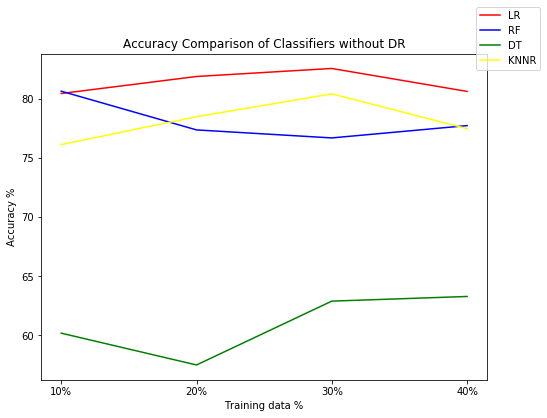

In [33]:
## Accuracy comparison graph
lr=accuracy_arr[0:4]
rf=accuracy_arr[4:8]
dt=accuracy_arr[8:12]
knnr=accuracy_arr[12:16]


acc=[("LR",lr,"red"),
     ("RF",rf,"blue"),
     ("DT",dt,"green"),
     ("KNNR",knnr,"yellow")]

for name, class_,color in acc:
    l = [class_ * 100 for class_ in class_]
    plt.plot(xx,l, label=name, color=color)
    
my_xticks = ['10%','20%','30%','40%','50%']
plt.xticks(xx, my_xticks)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel("Training data %")
plt.ylabel("Accuracy %")
plt.title("Accuracy Comparison of Classifiers without DR")
plt.show()

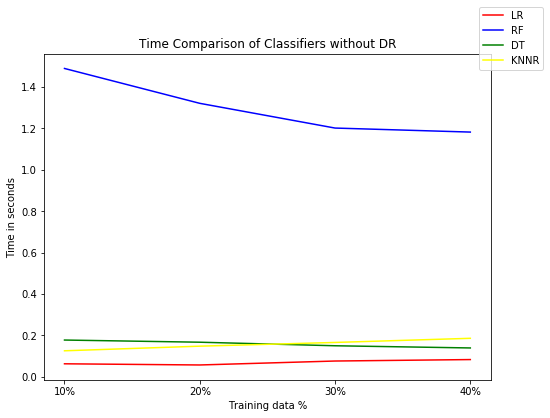

In [34]:
# Time comparison graph
lr=time_arr[0:4]
rf=time_arr[4:8]
dt=time_arr[8:12]
knnr=time_arr[12:16]

t=[("LR",lr,"red"),
     ("RF",rf,"blue"),
     ("DT",dt,"green"),
     ("KNNR",knnr,"yellow")]

for name, class_,color in t:
    plt.plot(xx,class_, label=name, color=color)

my_xticks = ['10%','20%','30%','40%','50%']
plt.xticks(xx, my_xticks)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel("Training data %")
plt.ylabel("Time in seconds")
plt.title("Time Comparison of Classifiers without DR")
plt.show()


In [35]:
# Train/Test Split with 70/30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=42)

In [36]:
#LR gives better accuracy and takes less time
#And also for such data, it is always adviceable to start with something simple:)
#lets pick Linear Regression at 70/30 Split and tune it to get better accuracy
## scikit-learn's Four-Step Modeling Pattern

# Make an instance of a LinearRegression object.
lr = LinearRegression(normalize=False) #we have scalarized
## Fit the model with data (aka "model training").
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)

In [37]:
score

0.825630603991949

In [41]:
#Lets turn this to a classification model
# Converting continuous variable into categorical value
y_ = [1 if each > 0.8 else 0 for each in y]

y_ = np.array(y_)

In [42]:
time_arr_c=[]
accuracy_arr_c=[]
rounds = 50

print("Classification")
classifiers = [
           ("Logistic Regression", LogisticRegression(),"red"),
           ("Random Forest ", RandomForestClassifier(),"blue"),
           ("Decision Tree", DecisionTreeClassifier(),"green"),
           ("KNN", KNeighborsClassifier(),"yellow" )]

xx = 1. - np.array(heldout)

for name, clf,color in classifiers:
    print("Training %s" % name)
    yy = []
    
    for i in heldout:
        t0 = time()
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y_, train_size=i, random_state=42)
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
        time_=time()-t0
        time_arr_c.append(time_)
        accuracy_arr_c.append(clf.score(X_test,y_test))
        yy.append(np.mean(yy_))
        print('Testing Accuracy: %f\tTime: %.2fs' % (clf.score(X_test,y_test),time_)) 


Classification
Training Logistic Regression
Testing Accuracy: 0.960000	Time: 0.06s
Testing Accuracy: 0.960000	Time: 0.09s
Testing Accuracy: 0.953333	Time: 0.07s
Testing Accuracy: 0.960000	Time: 0.15s
Training Random Forest 
Testing Accuracy: 0.960000	Time: 0.79s
Testing Accuracy: 0.950000	Time: 0.82s
Testing Accuracy: 0.960000	Time: 0.83s
Testing Accuracy: 0.950000	Time: 0.81s
Training Decision Tree
Testing Accuracy: 0.880000	Time: 0.10s
Testing Accuracy: 0.950000	Time: 0.08s
Testing Accuracy: 0.966667	Time: 0.06s
Testing Accuracy: 0.910000	Time: 0.07s
Training KNN
Testing Accuracy: 0.940000	Time: 0.13s
Testing Accuracy: 0.970000	Time: 0.13s
Testing Accuracy: 0.953333	Time: 0.16s
Testing Accuracy: 0.935000	Time: 0.18s
